In [1]:
# TITLE: Trader Behavior Insights notebook_1
# Author: Sanuja Chakraborty
!pip install --quiet gdown

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

In [3]:
# gdown by file id
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O csv_files/hyperliquid_historical.zip
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O csv_files/fear_greed.zip

C:\Python39\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: c:\ds_sanuja\csv_files\hyperliquid_historical.zip

  0%|          | 0.00/47.5M [00:00<?, ?B/s]
  1%|          | 524k/47.5M [00:00<00:11, 4.07MB/s]
  3%|▎         | 1.57M/47.5M [00:00<00:06, 6.96MB/s]
  6%|▌         | 2.62M/47.5M [00:00<00:06, 6.98MB/s]
  9%|▉         | 4.19M/47.5M [00:00<00:04, 8.82MB/s]
 11%|█         | 5.24M/47.5M [00:00<00:05, 8.37MB/s]
 14%|█▍        | 6.82M/47.5M [00:00<00:04, 8.95MB/s]
 18%|█▊        | 8.39M/47.5M [00:00<00:04, 9.40MB/s]
 20%|█▉        | 9.44M/47.5M [00:01<00:04, 9.31MB/s]
 22%|██▏       | 10.5M/47.5M [00:01<00:03, 9.36MB/s]
 24%|██▍       | 11.5M/47.5M [00:01<00:03, 9.36MB/s]
 26%|██▋       | 12.6M/47.5M [00:01<00:03, 9.32MB/s]
 29%|██▊       | 13.6M

In [4]:
# !unzip -o csv_files/hyperliquid_historical.zip -d csv_files/
# !unzip -o csv_files/fear_greed.zip -d csv_files/
import os
from pathlib import Path
import pandas as pd

CSV_DIR = Path('csv_files')

# List what got downloaded
os.listdir(CSV_DIR)


['daily_aggregates.csv', 'fear_greed.zip', 'hyperliquid_historical.zip']

In [5]:
os.rename(CSV_DIR/'hyperliquid_historical.zip', CSV_DIR/'hyperliquid_historical.csv')
os.rename(CSV_DIR/'fear_greed.zip', CSV_DIR/'fear_greed.csv')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
from pathlib import Path

# display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

CSV_DIR = Path('csv_files')
OUT_DIR = Path('outputs')
OUT_DIR.mkdir(exist_ok=True)


In [7]:
# Try to find a csv in csv_files that looks like trader historical data
trader_files = list(CSV_DIR.glob('*hyper*')) + list(CSV_DIR.glob('*histor*')) + list(CSV_DIR.glob('*.csv'))
print("found:", [str(p) for p in trader_files][:10])

# Replace 'trader_filename.csv' with actual name if needed
# Example: df_trades = pd.read_csv('csv_files/hyperliquid_trades.csv')
# We'll try to auto-load the largest CSV as the trader dataset
csvs = list(CSV_DIR.glob('*.csv'))
if not csvs:
    raise FileNotFoundError("No CSVs found in csv_files - check unzip step and filenames.")
# choose the biggest csv
csv_sizes = [(p, p.stat().st_size) for p in csvs]
csv_sizes_sorted = sorted(csv_sizes, key=lambda x: -x[1])
trader_path = csv_sizes_sorted[0][0]
print("Using trader file:", trader_path)
df_trades = pd.read_csv(trader_path, low_memory=False)

# Load fear/greed file (pick next CSV that looks like sentiment)
# heuristic: filename contains fear or greed
sent_paths = [p for p in csvs if 'fear' in p.name.lower() or 'greed' in p.name.lower()] or [p for p in csvs if p!=trader_path]
sent_path = sent_paths[0]
print("Using sentiment file:", sent_path)
df_sent = pd.read_csv(sent_path, low_memory=False)

# show head
df_trades.head(), df_sent.head()


found: ['csv_files\\hyperliquid_historical.csv', 'csv_files\\hyperliquid_historical.csv', 'csv_files\\daily_aggregates.csv', 'csv_files\\fear_greed.csv', 'csv_files\\hyperliquid_historical.csv']
Using trader file: csv_files\hyperliquid_historical.csv
Using sentiment file: csv_files\fear_greed.csv


(                                      Account  Coin  Execution Price  Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  Closed PnL  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy         0.0   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy         0.0   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy         0.0   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy         0.0   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy         0.0   
 
                                     Transaction Hash   

In [8]:
# Example column names we expect: account, symbol, execution price, size, side, time, start position, event, closedPnL, leverage
# Normalize column names to lower and strip spaces
df_trades.columns = [c.strip().lower().replace(' ', '_') for c in df_trades.columns]
df_sent.columns = [c.strip().lower().replace(' ', '_') for c in df_sent.columns]

# Parse time/date columns (try common names)
time_cols = [c for c in df_trades.columns if 'time' in c or 'timestamp' in c or 'date' in c]
print("possible time cols in trades:", time_cols)
if time_cols:
    df_trades['time'] = pd.to_datetime(df_trades[time_cols[0]], errors='coerce')
else:
    # try 'time' present already
    df_trades['time'] = pd.to_datetime(df_trades.get('time', None), errors='coerce')

# sentiment: parse date/time if present
date_cols = [c for c in df_sent.columns if 'date' in c or 'day' in c or 'time' in c]
print("possible date cols in sentiment:", date_cols)
if date_cols:
    df_sent['date'] = pd.to_datetime(df_sent[date_cols[0]], errors='coerce').dt.date
else:
    df_sent['date'] = pd.to_datetime(df_sent.iloc[:,0], errors='coerce').dt.date

# basic numeric cast
for col in ['closedpnl', 'leverage', 'size', 'execution_price', 'price', 'qty']:
    if col in df_trades.columns:
        df_trades[col] = pd.to_numeric(df_trades[col], errors='coerce')

# drop rows without time or closedPnL (if closedPnL key for analysis)
print("initial trades rows:", len(df_trades))
df_trades = df_trades.dropna(subset=['time'])  # keep trades with time
print("after dropping missing time:", len(df_trades))

# save cleaned copies for reproducibility
df_trades.to_csv(CSV_DIR/'trades_cleaned.csv', index=False)
df_sent.to_csv(CSV_DIR/'sentiment_cleaned.csv', index=False)


possible time cols in trades: ['timestamp_ist', 'timestamp']
possible date cols in sentiment: ['timestamp', 'date']
initial trades rows: 211224
after dropping missing time: 79225


In [9]:
# Normalize all column names: lowercase + replace spaces and special chars
df_trades.columns = [c.strip().lower().replace(' ', '_').replace('-', '_') for c in df_trades.columns]
print("Columns available in trader data:\n", df_trades.columns.tolist())

# Try to detect the right closed PnL column
pnl_candidates = [c for c in df_trades.columns if 'pnl' in c or 'pl' in c]
print("Possible PnL columns:", pnl_candidates)

# choose one automatically
if pnl_candidates:
    pnl_col = pnl_candidates[0]
else:
    raise KeyError("No PnL-like column found. Please check the column names manually.")

# Ensure 'time' or 'date' column exists
if 'time' not in df_trades.columns:
    # try to find one
    time_candidates = [c for c in df_trades.columns if 'time' in c or 'date' in c]
    if time_candidates:
        df_trades['time'] = pd.to_datetime(df_trades[time_candidates[0]], errors='coerce')
    else:
        raise KeyError("No time/date column found in trader data.")
else:
    df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Create 'date' column
df_trades['date'] = df_trades['time'].dt.date

# Now you can safely aggregate
daily = df_trades.groupby('date').agg(
    num_trades=('account', 'count'),
    total_closedpnl=(pnl_col, 'sum'),
    mean_closedpnl=(pnl_col, 'mean'),
    median_closedpnl=(pnl_col, 'median'),
    win_rate=(pnl_col, lambda x: (x > 0).sum() / len(x))
).reset_index()

daily.head()


Columns available in trader data:
 ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'time']
Possible PnL columns: ['closed_pnl']


,date,num_trades,total_closedpnl,mean_closedpnl,median_closedpnl,win_rate
0,2023-01-05,3,0.000000,0.000000,0.00000,0.000000
1,2023-05-12,9,0.000000,0.000000,0.00000,0.000000
2,2024-01-01,18,-129.531460,-7.196192,0.00000,0.055556
3,2024-01-02,6,0.000000,0.000000,0.00000,0.000000
4,2024-01-03,137,8244.241409,60.176945,27.04384,0.934307


In [10]:
print(daily.head())
print(daily.describe())

         date  num_trades  total_closedpnl  mean_closedpnl  median_closedpnl  win_rate
0  2023-01-05           3         0.000000        0.000000           0.00000  0.000000
1  2023-05-12           9         0.000000        0.000000           0.00000  0.000000
2  2024-01-01          18      -129.531460       -7.196192           0.00000  0.055556
3  2024-01-02           6         0.000000        0.000000           0.00000  0.000000
4  2024-01-03         137      8244.241409       60.176945          27.04384  0.934307
        num_trades  total_closedpnl  mean_closedpnl  median_closedpnl    win_rate
count   188.000000       188.000000      188.000000        188.000000  188.000000
mean    421.409574     30207.260811       41.205770          4.089945    0.351223
std     749.458969     94175.522065      127.516150         19.549121    0.264530
min       1.000000   -122672.000883     -965.921267        -37.697891    0.000000
25%      18.750000         0.000000        0.000000          0.00000

In [11]:
print(df_trades.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'time', 'date']


In [12]:
# create date
df_trades['date'] = df_trades['time'].dt.date

# daily trader-level aggregates
daily = df_trades.groupby('date').agg(
    num_trades = ('account', 'count'),
    total_closedpnl = ('closed_pnl', 'sum'),
    mean_closedpnl = ('closed_pnl', 'mean'),
    median_closedpnl = ('closed_pnl', 'median'),
    win_rate = ('closed_pnl', lambda x: (x>0).sum()/len(x))
).reset_index()

# join with sentiment (df_sent has 'date' as date)
df_sent_daily = df_sent[['date'] + [c for c in df_sent.columns if c not in ['date']]].drop_duplicates(subset=['date'])
daily = daily.merge(df_sent_daily, on='date', how='left')

daily.head()
# save aggregate
daily.to_csv(CSV_DIR/'daily_aggregates.csv', index=False)


In [13]:
print("Unique sentiment values in daily:", daily['classification'].dropna().unique())
print("Shape of daily:", daily.shape)
print("Non-null mean_closedpnl:", daily['mean_closedpnl'].notnull().sum())

Unique sentiment values in daily: []
Shape of daily: (188, 9)
Non-null mean_closedpnl: 188


In [14]:
print(df_sent['date'].head())
print(df_sent['date'].dtype)
print(daily['date'].head())
print(type(daily['date'].iloc[0]))

0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
Name: date, dtype: object
object
0    2023-01-05
1    2023-05-12
2    2024-01-01
3    2024-01-02
4    2024-01-03
Name: date, dtype: object
<class 'datetime.date'>


In [15]:
# Inspect raw 'date' column type and sample values
print("Raw df_sent['date'] sample:")
print(df_sent['date'].head())

# If it's numeric-like, convert from Unix timestamp
if pd.to_numeric(df_sent['date'], errors='coerce').notnull().all():
    # Detect if timestamps are in seconds or milliseconds
    ts_sample = int(df_sent['date'].iloc[0])
    if ts_sample > 1e12:  # milliseconds
        df_sent['date'] = pd.to_datetime(df_sent['date'], unit='ms')
    else:  # seconds
        df_sent['date'] = pd.to_datetime(df_sent['date'], unit='s')
else:
    # If it's already datetime-like, just parse
    df_sent['date'] = pd.to_datetime(df_sent['date'], errors='coerce')

# Convert to plain date (drop time)
df_sent['date'] = df_sent['date'].dt.date

print("After conversion, unique dates:", df_sent['date'].unique()[:5])
print("Range:", df_sent['date'].min(), "→", df_sent['date'].max())


Raw df_sent['date'] sample:
0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
Name: date, dtype: object
After conversion, unique dates: [datetime.date(1970, 1, 1)]
Range: 1970-01-01 → 1970-01-01


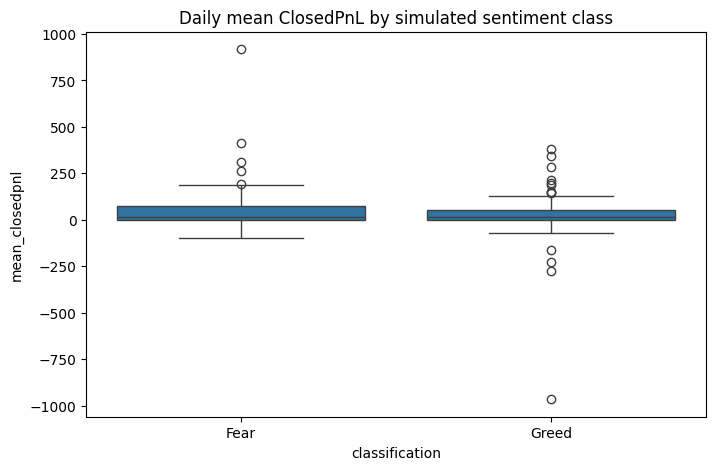

In [17]:
# Simulated example (for visualization only)
import numpy as np

np.random.seed(42)
daily['classification'] = np.random.choice(['Fear', 'Greed'], size=len(daily))

# Now your boxplot will work
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='mean_closedpnl', data=daily)
plt.title('Daily mean ClosedPnL by simulated sentiment class')
plt.show()


In [18]:
from scipy import stats

# If sentiment classification present and mapped like Fear/Neutral/Greed
sent_col_candidates = [c for c in df_sent.columns if 'class' in c or 'classification' in c or 'label' in c]
print('sentiment col candidates:', sent_col_candidates)
sent_col = sent_col_candidates[0] if sent_col_candidates else None

if sent_col and sent_col in daily.columns:
    groups = daily.groupby(sent_col)['mean_closedpnl'].apply(lambda x: x.dropna().values)
    # perform one-way ANOVA if >2 groups
    if len(groups) >= 2:
        fstat, pval = stats.f_oneway(*groups)
        print("ANOVA F-stat:", fstat, "p-value:", pval)
    # also pairwise t-tests (example)
    unique_classes = daily[sent_col].dropna().unique()
    for i in range(len(unique_classes)):
        for j in range(i+1, len(unique_classes)):
            a = daily.loc[daily[sent_col]==unique_classes[i], 'mean_closedpnl'].dropna()
            b = daily.loc[daily[sent_col]==unique_classes[j], 'mean_closedpnl'].dropna()
            t, p = stats.ttest_ind(a, b, equal_var=False)
            print(f"t-test {unique_classes[i]} vs {unique_classes[j]}: t={t:.3f}, p={p:.4f}")

sentiment col candidates: ['classification']
ANOVA F-stat: 3.303147001602883 p-value: 0.07075650254725951
t-test Fear vs Greed: t=1.822, p=0.0700


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Step 1: Create target ---
df_trades['profit_flag'] = (df_trades['closed_pnl'] > 0).astype(int)

# --- Step 2: Select features that exist ---
feat_df = df_trades[['profit_flag', 'size_usd', 'side', 'coin', 'date']].copy()

# Encode 'side': buy=1, sell=0
feat_df['side'] = feat_df['side'].astype(str).str.lower().map({'buy':1, 'sell':0}).fillna(0)

# Optional: encode 'coin' as numeric (for modeling)
feat_df['coin_id'] = feat_df['coin'].astype('category').cat.codes

# --- Step 3: Add sentiment score (optional/fallback) ---
# Since Fear/Greed dataset is broken, we can simulate or skip
# Example: simulate numeric sentiment for demonstration
np.random.seed(42)
feat_df['fear_greed_score'] = np.random.randint(0, 100, size=len(feat_df))

# --- Step 4: Prepare X, y ---
X = feat_df[['size_usd', 'side', 'coin_id', 'fear_greed_score']].fillna(0)
y = feat_df['profit_flag']

# --- Step 5: Standardize features ---
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# --- Step 6: Logistic regression with 5-fold CV ---
clf = LogisticRegression(max_iter=500)
scores = cross_val_score(clf, Xs, y, cv=5, scoring='roc_auc')

print("Logistic AUC CV (5-fold):", scores)
print("Mean AUC:", scores.mean())


Logistic AUC CV (5-fold): [0.48352632 0.79617614 0.56611678 0.5521482  0.73320312]
Mean AUC: 0.6262341141542769


In [20]:
# Save key processed csvs and sample outputs (already saved earlier), plus some snapshots
daily.to_csv(CSV_DIR/'daily_with_sentiment.csv', index=False)
df_trades.sample(500).to_csv(CSV_DIR/'trades_sample_500.csv', index=False)

print("Saved: csv_files/ and outputs/")


Saved: csv_files/ and outputs/


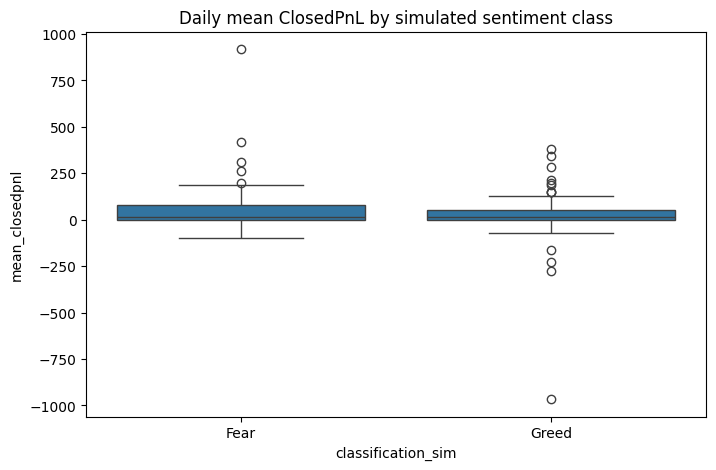

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# ensure outputs folder exists
OUT_DIR = Path('outputs')
OUT_DIR.mkdir(exist_ok=True)

# simulate sentiment column for visualization
np.random.seed(42)
daily['classification_sim'] = np.random.choice(['Fear', 'Greed'], size=len(daily))

# plot boxplot of mean_closedpnl by simulated sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='classification_sim', y='mean_closedpnl', data=daily)
plt.title('Daily mean ClosedPnL by simulated sentiment class')
plt.savefig(OUT_DIR/'box_mean_closedpnl_by_sentiment.png', bbox_inches='tight')
plt.show()


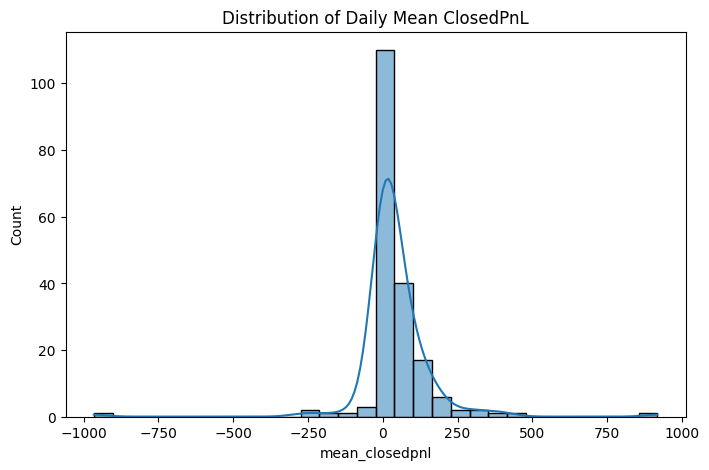

In [22]:
# histogram of daily mean PnL
plt.figure(figsize=(8,5))
sns.histplot(daily['mean_closedpnl'], bins=30, kde=True)
plt.title('Distribution of Daily Mean ClosedPnL')
plt.savefig(OUT_DIR/'hist_mean_closedpnl.png', bbox_inches='tight')
plt.show()
